In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from time import sleep 
from scipy.signal import butter, filtfilt
from scipy.ndimage import median_filter

with open("data/data_219.pkl", 'rb') as fin:
    res = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_219.pkl'

In [2]:

import neurokit2 as nk
import matplotlib.pyplot as plt

# Generate a synthetic ECG signal for demonstration
ecg_signal = nk.ecg_simulate(duration=10, heart_rate=70)

# Extract R-peaks from the ECG signal
r_peaks, _ = nk.ecg_peaks(ecg_signal)

# Plot the ECG signal
plt.plot(ecg_signal, label='ECG Signal')

# Mark R-peaks on the plot
plt.scatter(r_peaks, ecg_signal[r_peaks], color='red', label='R-peaks')

# Add labels and legend
plt.xlabel('Sample')
plt.ylabel('ECG Amplitude')
plt.title('ECG Signal with R-peaks')
plt.legend()

# Show the plot
plt.show()


SyntaxError: unterminated string literal (detected at line 1) (3438383012.py, line 1)

In [2]:
def high_pass_filter(signal_array, cutoff_frequency=0.5, order=4, fs=128):
    b, a = butter(order, cutoff_frequency / (0.5 * fs), btype='high')
    filtered_ecg_high = filtfilt(b, a, signal_array)

    return filtered_ecg_high


def powerline_filter(signal_array, fs=128, powerline=50):
    if fs >= 100:
        b = np.ones(int(fs / powerline))
    else:
        b = np.ones(2)
    a = [len(b)]
    y = filtfilt(b, a, signal_array, method="pad")
    return y


def emg_noise_filter(signal_array, fs=128):
    lowcut = 0.5  # Lower cutoff frequency (Hz)
    highcut = 50.0  # Upper cutoff frequency (Hz)
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(1, [low, high], btype='band')

    # Apply the bandpass filter to remove noise
    ecg_filtered = filtfilt(b, a, signal_array)

    return ecg_filtered


def median_filter_local(signal_array, fs=128):
    window_size = int(fs * 0.125)

    return median_filter(signal_array, size=window_size)

def low_pass_filter(signal_array, cutoff_frequency=50, order=4, fs=128):
    b, a = butter(order, cutoff_frequency / (0.5 * fs), btype='low')
    filtered_ecg_low = filtfilt(b, a, signal_array)

    return filtered_ecg_low

KeyboardInterrupt: 

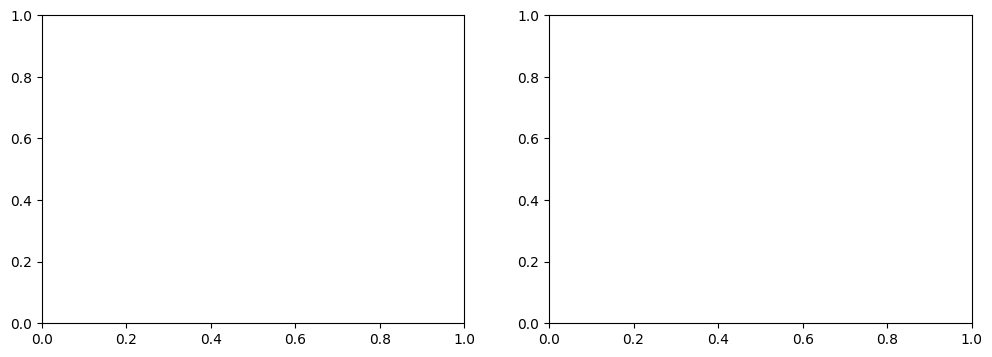

In [7]:


index = 1
time = 128*200

# Create a 1x2 subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot ECG signals side by side
for each_step in range(0, res["data"][0].shape[0], time):

    this_data = res["data"][index][each_step:each_step + time]
    # Plot the first ECG signal
    axs[0].plot(np.arange(time), this_data, label='ECG Signal original')
    axs[0].set_title('ECG Signal original')
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('ECG Signal')
    axs[0].legend()
    axs[0].grid(True)

    filtered_data = low_pass_filter(this_data.copy(), cutoff_frequency=50, order=4, fs=128)
    filtered_data = high_pass_filter(filtered_data.copy(), fs=128)
    filtered_data = powerline_filter(filtered_data.copy(), fs=128)
    filtered_data = emg_noise_filter(filtered_data, fs=128)
    #filtered_data = median_filter_local(filtered_data, fs=128)
    filtered_data = (filtered_data - filtered_data.mean())/filtered_data.std()
    # Plot the second ECG signal
    axs[1].plot(np.arange(time)[:128*3], filtered_data[:128*3], label='ECG Signal Filtered')
    axs[1].set_title('ECG Signal Filtered')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('ECG Signal')
    axs[1].legend()
    axs[1].grid(True)


    display(fig)

    # Clear the output for the next plot
    clear_output(wait=True)
    
    # Clear the subplots for the next iteration
    for ax in axs:
        ax.cla()

    # Pause for 1 second to simulate a 1 Hz update rate
    sleep(1)



In [16]:
import numpy as np
import neurokit2 as nk

X = res["data"]
Y = (res["ejection_fraction"] > 0.5).astype(int)
n_sample = X.shape[0]

for each_sample in range(n_sample):
    #print(each_sample)

    tmp_ts = X[each_sample]
    tmp_Y = Y[each_sample]

    filtered_data = tmp_ts.copy()

    filtered_data = low_pass_filter(filtered_data, cutoff_frequency=50, order=4, fs=128)
    filtered_data = high_pass_filter(filtered_data.copy(), fs=128)
    filtered_data = powerline_filter(filtered_data.copy(), fs=128)
    filtered_data = emg_noise_filter(filtered_data, fs=128)
    #filtered_data = median_filter_local(filtered_data, fs=128)

    #array_filtered = median_filter_local(array_filtered)

    X_peaks = nk.ecg_peaks(filtered_data.reshape(-1), sampling_rate=128, method="pantompkins1985")
    print(each_sample, len(np.where(X_peaks[0]["ECG_R_Peaks"] == 1)[0]), tmp_Y)
    #if(len(np.where(X_peaks[0]["ECG_R_Peaks"] == 1)[0]) < 200):
    #    print(each_sample, len(np.where(X_peaks[0]["ECG_R_Peaks"] == 1)[0]))

0 19054 1
1 18074 0
2 12593 1
3 21942 0
4 15845 0
5 1224 0
6 14716 1
7 19446 0
8 16731 1
9 4009 0
10 18212 0
11 2576 1
12 16066 1
13 10492 0
14 9106 1
15 355 1
16 27509 1
17 2525 0
18 5772 1
19 21320 1
20 152 1
21 15609 1


KeyboardInterrupt: 

In [29]:
0 19054 1
1 18070 0
2 12594 1
3 21947 0
4 15845 0
5 1224 0
6 14716 1
7 19444 0
8 16732 1
9 4136 0
10 18204 0
11 2576 1
12 16066 1
13 10500 0
14 7063 1
15 354 1
16 27699 1
17 2530 0
18 5778 1
19 24545 1
20 154 1
21 15658 1
22 2766 0
23 16305 0
24 18338 0
25 13950 0
26 15829 1
27 9869 0
28 20583 0
29 12398 0
30 15036 1
31 15218 0
32 13087 0
33 13443 0
34 7478 1
35 12326 1
36 4128 0
37 7640 1
38 14977 1
39 11045 1
40 19184 1

array([    108,     240,     372, ..., 1842979, 1843060, 1843150])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


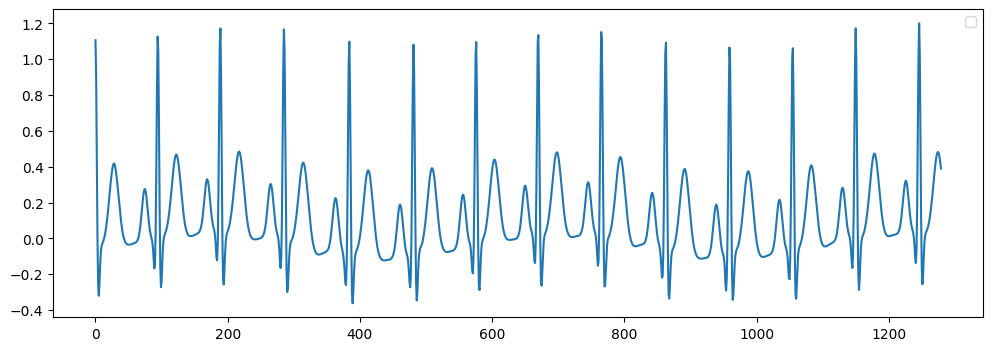

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

# Simulate ECG signal
ecg = nk.ecg_simulate(duration=10, sampling_rate=128, heart_rate=80)
signals, info = nk.ecg_process(ecg, sampling_rate=128)
ecg_signal = signals["ECG_Raw"]
rpeaks = signals["ECG_R_Peaks"]
# Plot the simulated ECG signal with R-peaks
plt.figure(figsize=(12, 4))
time = np.arange(0, len(ecg_signal)) / 128  # Convert to seconds
plt.plot(np.arange(0, len(ecg_signal)), ecg_signal)
#plt.scatter(ecg_signal[rpeaks==1].index, ecg_signal[rpeaks==1], c='red', marker='o', label='R-peaks')
#plt.title('Simulated ECG Signal with R-peaks using NeuroKit2')
#plt.xlabel('Data points')
#plt.ylabel('Amplitude')
plt.legend()
plt.show()
